# Atividade - Economia Regional e Urbana - Análise de Minas Gerais

- Estatística I de Moran
- Gráfico de dispersão de Moran
- Gráfico de dispersão de Moran Bivariado
- Gráfico LISA (Moran Local Univariado) (Gráfico de Clusters)
- Gráfico LISA (Moran Local Bivariado)

In [146]:
import geopandas
import pygeoda
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# colors = [#F4663A, #7A306C, #8E8DBE, #9EBC9E, #F1DAC4, #EAE8DB, #333229]
sns.set_palette(sns.color_palette("flare"))

In [144]:
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

## Tratamento dos Dados

In [133]:
gdf = geopandas.read_file("dados/MG/MG_Mun97_region.shp")

gdf.head()

,WGDPPC_14,CODMUN6,MUNIC_PIO,SEM_ACENTO,MUNIC_PI0,UF,UF_IBGE,REGI_O,MESO_IBGE,MESO_IBG0,...,IDHM_10,IDHM_E_10,IDHM_L_10,IDHM_R_10,VAAGR_14,VAIND_14,VASER_14,VAADM_14,QT,geometry
0,34835.8900,311455,CARNEIRINHO,CARNEIRINHO,3114550,MG,31,SE,TRIANGULO MINEIRO/ALTO PARANAIBA,05,...,0.741,0.622,0.873,0.749,73604,47679,69822,43949,1.0,"POLYGON ((-51.03577 -19.79163, -51.03520 -19.7..."
1,29214.4725,313862,LIMEIRA DO OESTE,LIMEIRA DO OESTE,3138625,MG,31,SE,TRIANGULO MINEIRO/ALTO PARANAIBA,05,...,0.710,0.620,0.834,0.693,75853,32772,54242,31690,1.0,"POLYGON ((-50.82957 -19.31027, -50.82790 -19.3..."
2,21563.3220,315980,SANTA VITÓRIA,SANTA VITORIA,3159803,MG,31,SE,TRIANGULO MINEIRO/ALTO PARANAIBA,05,...,0.710,0.576,0.865,0.718,130951,57726,181443,94000,1.0,"POLYGON ((-50.74148 -19.21245, -50.74271 -19.1..."
3,24282.1420,313440,ITURAMA,ITURAMA,3134400,MG,31,SE,TRIANGULO MINEIRO/ALTO PARANAIBA,05,...,0.747,0.674,0.848,0.730,82055,738346,462679,139686,1.0,"POLYGON ((-50.69102 -19.57251, -50.68522 -19.5..."
4,29868.8600,317043,UNIÃO DE MINAS,UNIAO DE MINAS,3170438,MG,31,SE,TRIANGULO MINEIRO/ALTO PARANAIBA,05,...,0.672,0.534,0.829,0.684,53716,7355,22325,19581,1.0,"POLYGON ((-50.51562 -19.27241, -50.51452 -19.2..."


In [134]:
paths = [r"dados/Base_Dados_PIB_dos_Municipios_1999_2002/05 05 2005 Base Dados Ajustada PIB dos Municípios 1999-2002.xls",
         r"dados/Base_Dados_PIB_dos_Municipios_2003_2007/base.xls"]

for file in paths:
    
    df = pd.read_excel(file, dtype={"cod_munic": str, "cod_uf": str})

    df = df.rename({name: str(name).upper() for name in df.columns}, axis=1)
    df = df[["ANO", "COD_UF", "COD_MUNIC", "AGRO", "IND", "SERV"]].query("COD_UF == '31'")

  
    for ano in df["ANO"].unique():
        filler_ano = str(ano)[-2:]
        df_y = df[df["ANO"] == ano].drop(["ANO", "COD_UF"], axis=1).rename({"AGRO": f"VAAGR_{filler_ano}", 
                                                                            "IND": f"VAIND_{filler_ano}", 
                                                                            "SERV": f"VASER_{filler_ano}", 
                                                                            "COD_MUNIC": "MUNIC_PI0"}, axis=1)
        
        gdf = pd.merge(gdf, df_y, how="left", on="MUNIC_PI0")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [105]:
# gdf.to_file("dados/MG_Extra.shp")

## Estatística I de Moran e Gráfico de Dispersão

In [135]:
mg = pygeoda.open(gdf)
queen_w = pygeoda.queen_weights(mg)

In [155]:
# ('#eeeeee', '#b2182b', '#ef8a62', '#fddbc7', '#67adc7', '#464646', '#999999')

def graph(gdf, var, title: str):
    
    fig, ax = plt.subplots(figsize=(10, 10))

    # lisa_colors = var.lisa_colors()
    lisa_colors = ("#eeeeee", "#F55A2A", "#542E60", "#b483c3", "#f8835f", "#464646", "#999999")
    lisa_labels = var.lisa_labels()

    # attach LISA cluster indicators to geodataframe
    gdf["LISA_CLUSTERS"] = var.lisa_clusters()

    for ctype, data in gdf.groupby("LISA_CLUSTERS"):
        color = lisa_colors[ctype]
        lbl = lisa_labels[ctype]
        data.plot(color=color, 
                ax=ax, 
                label=lbl, 
                edgecolor="black", 
                linewidth=0.2)

    # Place legend in the lower right hand corner of the plot
    # lisa_legend = [matplotlib.lines.Line2D([0], [0], color=color, lw=2) for color in lisa_colors]
    # ax.legend(lisa_legend, lisa_labels, loc="lower left", fontsize=10, frameon=True)
    ax.set(title=title)
    ax.set_axis_off()

In [137]:
# Variáveis que serão utlizadas
GDPPC_99 = pygeoda.local_moran(queen_w, gdf['GDPPC_99'], permutations=9999)
GDPPC_14 = pygeoda.local_moran(queen_w, gdf['GDPPC_14'], permutations=9999)

VAAGR_99 = pygeoda.local_moran(queen_w, gdf['VAAGR_99'], permutations=9999)
VAAGR_14 = pygeoda.local_moran(queen_w, gdf['VAAGR_14'], permutations=9999)

VAIND_99 = pygeoda.local_moran(queen_w, gdf['VAIND_99'], permutations=9999)
VAIND_14 = pygeoda.local_moran(queen_w, gdf['VAIND_14'], permutations=9999)

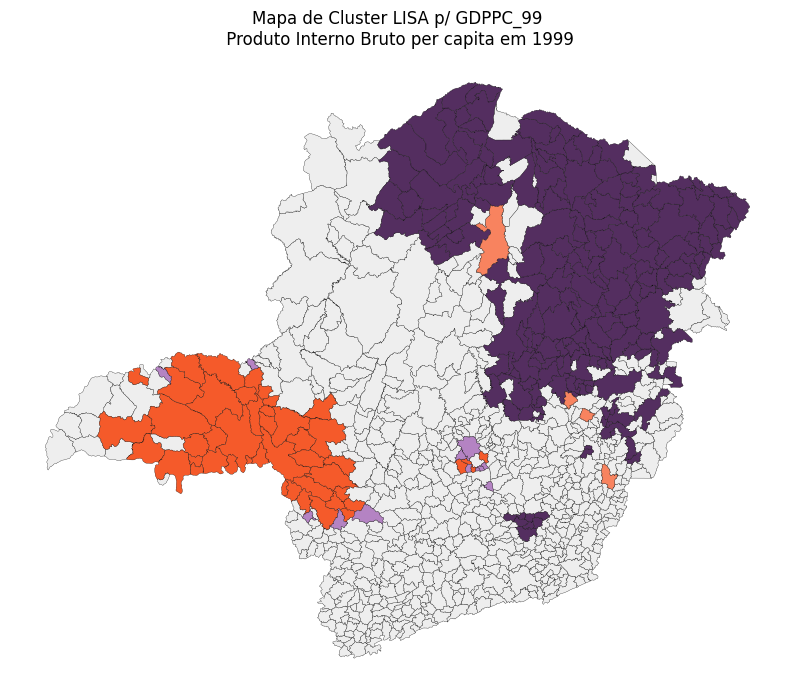

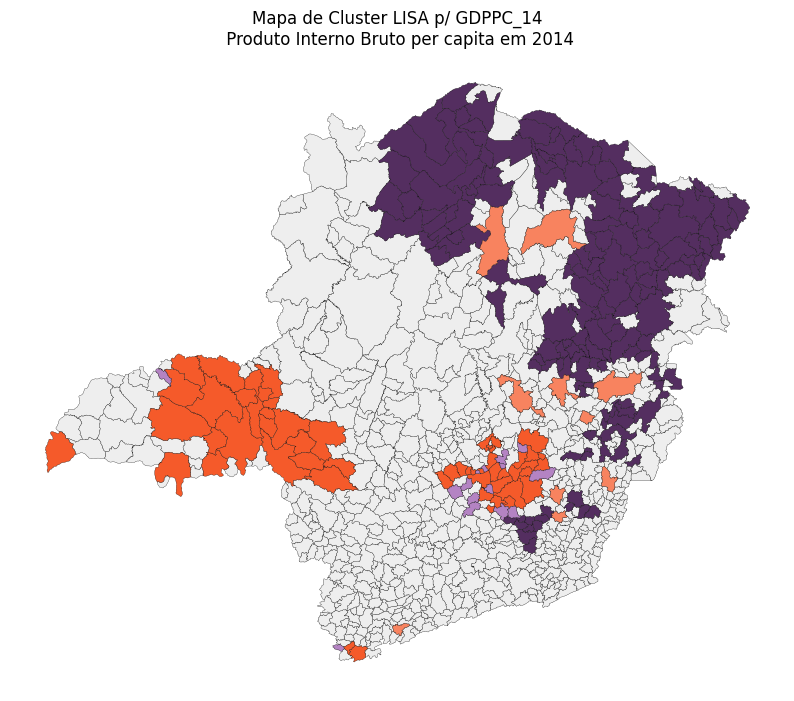

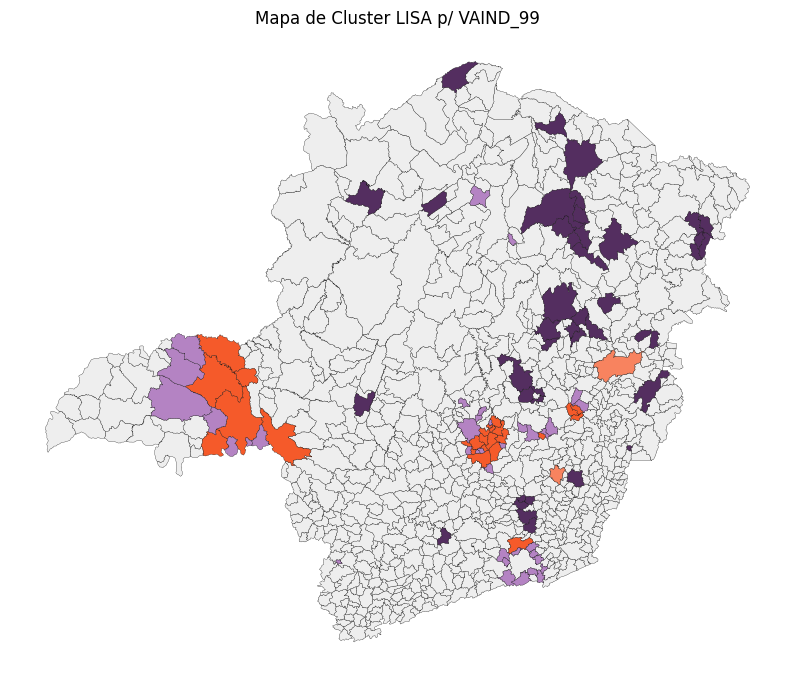

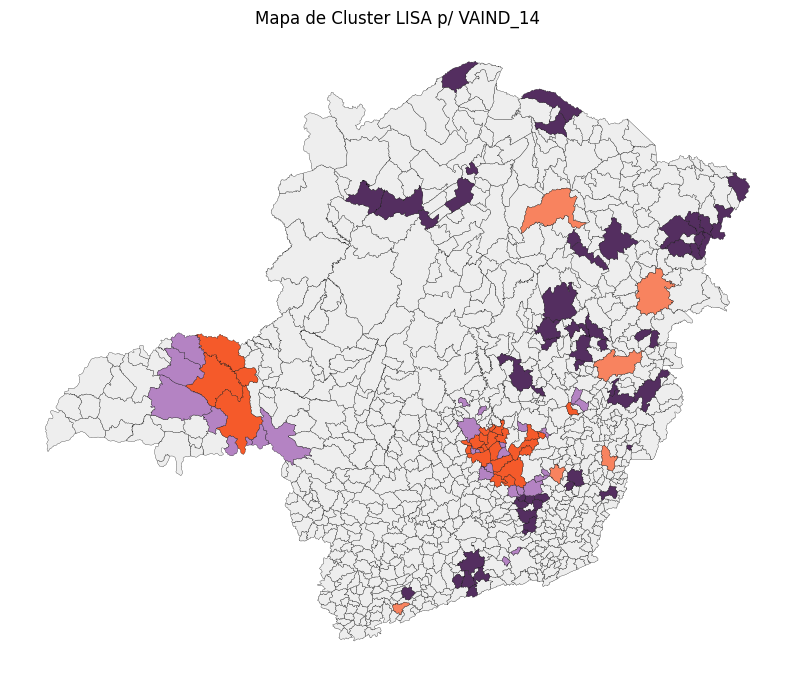

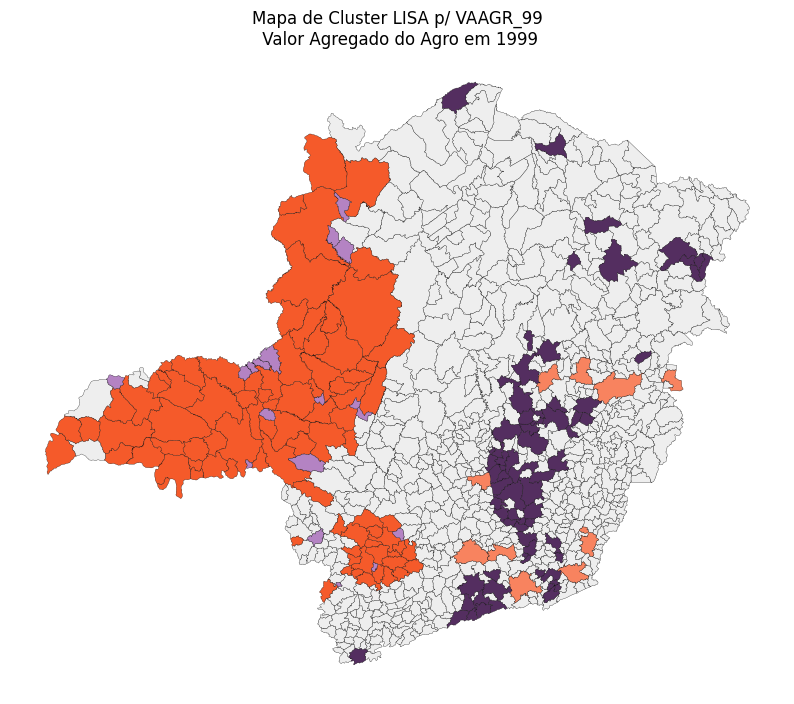

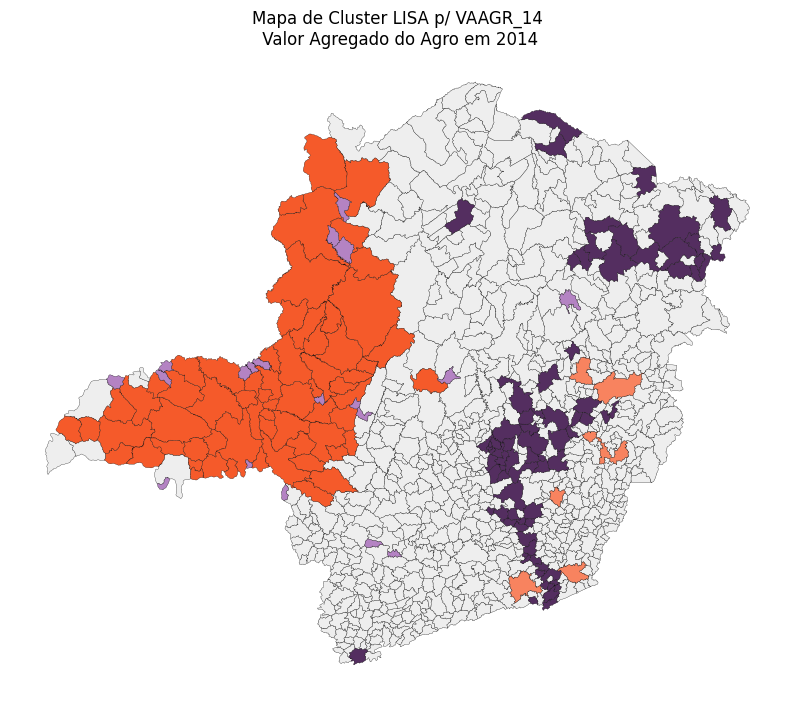

In [156]:
graph(gdf, GDPPC_99, "Mapa de Cluster LISA p/ GDPPC_99\n Produto Interno Bruto per capita em 1999")
graph(gdf, GDPPC_14, "Mapa de Cluster LISA p/ GDPPC_14\n Produto Interno Bruto per capita em 2014")

graph(gdf, VAIND_99, "Mapa de Cluster LISA p/ VAIND_99")
graph(gdf, VAIND_14, "Mapa de Cluster LISA p/ VAIND_14")

graph(gdf, VAAGR_99, "Mapa de Cluster LISA p/ VAAGR_99\n Valor Agregado do Agro em 1999")
graph(gdf, VAAGR_14, "Mapa de Cluster LISA p/ VAAGR_14\n Valor Agregado do Agro em 2014")

In [145]:
# colors = ("#eeeeee",         "#F55A2A",   "#542E60", "#b483c3,  "#f8835f",  "#464646",   "#999999")
# labels = ("Not significant", "High-High", "Low-Low", "Low-High", "High-Low", "Undefined", "Isolated")
print(GDPPC_14.lisa_colors())
print(GDPPC_14.lisa_labels())

('#eeeeee', '#FF0000', '#0000FF', '#a7adf9', '#f4ada8', '#464646', '#999999')
('Not significant', 'High-High', 'Low-Low', 'Low-High', 'High-Low', 'Undefined', 'Isolated')
